# AB TESTING

AB Testing adalah metode membandingkan dua versi satu sama lain untuk menentukan mana yang berkinerja lebih baik. Pada AB Testing, analisis statistik digunakan untuk menentukan variasi mana yang berkinerja lebih baik untuk sasaran konversi yang diberikan.<br><br>

Kasus : <br>
Satrio adalah seorang data scientist pada sebuah perusahaan retail indoastra. Satrio memiliki terobosan baru yaitu menggunakan e-payment pada sistem pembayaran di kasir. Akan tetapi karyawan lain merendahkan idenya, karena menurut mereka dengan menggunakan cash saja sudah efektif. Maka dari itu Satrio ingin menguji penggunakan e-payment pada salah satu cabang indoastra dengan cara AB TESTING.<br><br>
Satrio menguji 2 cabang, yaitu cabang A dan cabang B. Cabang A akan menggunakan cash untuk pembayarannya, sedangkan untuk Cabang B akan menggunakan e-payment. Pengujian tersebut dilakukan selama 7 hari untuk melihat hasilnya. <br>
Pada AB TESTING parameter yang digunakan adalah :
- Rata-rata waktu pembayaran
- Convertion rate (proporsi dari pelanggan yang melakukan transaksi)
<br><br>
Data yang digunakan pada pengujian ini adalah data transaksi dari kedua cabang yang akan diuji dengan AB Testing.


## Import Package

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import ttest_ind

## Load Data

In [2]:
data = pd.read_csv('datapembelian.csv')

In [3]:
data

,day,merchant,cust,payment,avg_paytime,conv_rate
0,1,A,2002,cash,15,0.4
1,1,B,1809,epayment,7,0.3
2,2,A,2111,cash,12,0.3
3,2,B,2287,epayment,8,0.7
4,3,A,1923,cash,9,0.5
5,3,B,2321,epayment,6,0.6
6,4,A,1298,cash,11,0.4
7,4,B,901,epayment,5,0.4
8,5,A,650,cash,8,0.8
9,5,B,1902,epayment,6,0.7


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
day            14 non-null int64
merchant       14 non-null object
cust           14 non-null int64
payment        14 non-null object
avg_paytime    14 non-null int64
conv_rate      14 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 800.0+ bytes


In [5]:
data.columns

Index(['day', 'merchant', 'cust', 'payment', 'avg_paytime', 'conv_rate'], dtype='object')

### Count Missing Value

In [6]:
count_missing = data.isnull().sum().sort_values(ascending = False)
print(count_missing)

conv_rate      0
avg_paytime    0
payment        0
cust           0
merchant       0
day            0
dtype: int64


## Data Visualization

### Bar Plot
Untuk mengetahui lamanya rata-rata pembayaran dengan menggunakan cash dan e-payment<br>
Dari bar plot dibawah ini dapat diketahui bahwa pembayaran dengan metode e-payment memakan waktu lebih sedikit dibandingkan cash

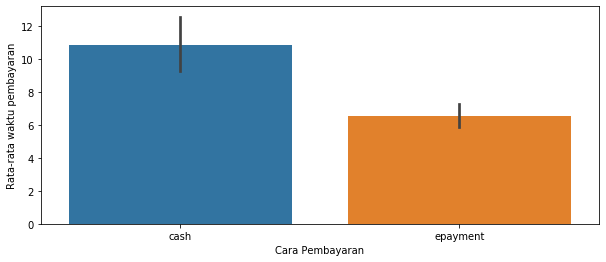

In [7]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(x='payment', y='avg_paytime', data=data, ax=ax)
plt.xlabel('Cara Pembayaran')
plt.ylabel('Rata-rata waktu pembayaran')
plt.show()

Untuk mengetahui jumlah pelanggan pada Cabang A dan Cabang B <br>
Pada Bar Plot dibawah dapat diketahui bahwa jumlah pelanggan Cabang B lebih banyak dibandingkan dengan Cabang A

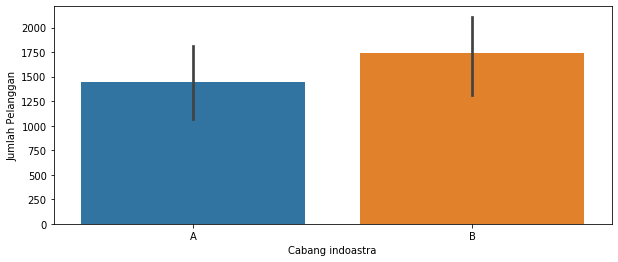

In [11]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(x='merchant', y='cust', data=data, ax=ax)
plt.xlabel('Cabang indoastra')
plt.ylabel('Jumlah Pelanggan')
plt.show()

Untuk mengetahui rata-rata convertion rate per hari

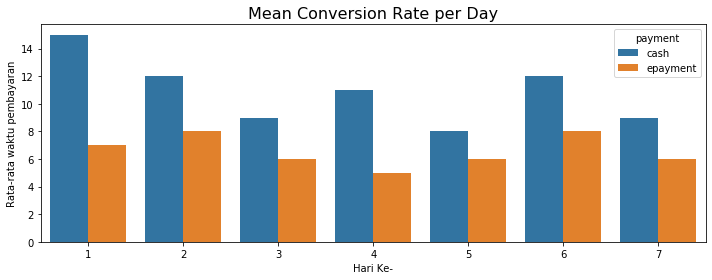

In [17]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(x='day', y='avg_paytime', hue='payment', data=data, ax=ax)
ax.set_title('Mean Conversion Rate per Day', fontsize=16)
plt.xlabel('Hari Ke-')
plt.ylabel('Rata-rata waktu pembayaran')
plt.tight_layout()
plt.show()

### Box Plot
Untuk mengetahui outlier dari masing-masing fitur

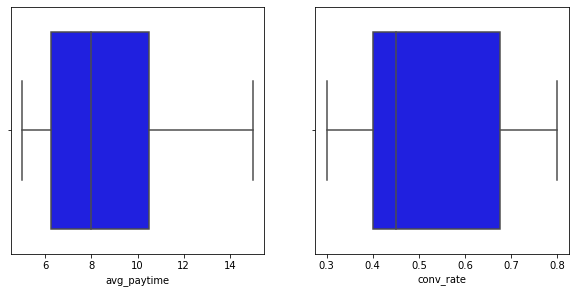

In [9]:
f=plt.figure(figsize=(10,10))
f.add_subplot(2,2,1)
sns.boxplot(data['avg_paytime'], color = 'blue',orient = "h")
f.add_subplot(2,2,2)
sns.boxplot(data['conv_rate'], color = 'blue',orient = "h")

## Change the categorical feature into numeric

In [79]:
from sklearn.preprocessing import LabelEncoder
data['payment'] = LabelEncoder().fit_transform(data['payment'])

In [80]:
data

,day,merchant,cust,payment,avg_paytime,conv_rate
0,1,A,2002,0,15,0.4
1,1,B,1809,1,7,0.3
2,2,A,2111,0,12,0.3
3,2,B,2287,1,8,0.7
4,3,A,1923,0,9,0.5
5,3,B,2321,1,6,0.6
6,4,A,1298,0,11,0.4
7,4,B,901,1,5,0.4
8,5,A,650,0,8,0.8
9,5,B,1902,1,6,0.7


### Hypotessis
H0 : rata-rata waktu pembayaran dengan menggunakan cash dan epayment sama<br>
H1 : rata-rata waktu pembayaran dengan menggunakan epayment lebih cepat daripada cash

## T-test for Average Payment Time
- alpha / confidence level = 0.05

In [81]:
test_val = data[data['payment'] == 1]['avg_paytime'].values
cont_val = data[data['payment'] == 0]['avg_paytime'].values

In [82]:
print(test_val.mean(), '\t', cont_val.mean())

6.571428571428571 	 10.857142857142858


In [83]:
print(ttest_ind(test_val, cont_val, equal_var=False))

Ttest_indResult(statistic=-4.256853928563619, pvalue=0.002394900697258744)


### Result : 
Karena nilai pvalue kurang dari 0.05 (alpha/confidence level) maka *reject* H0 dan dapat diambil kesimpulan bahwa rata-rata pembayaran menggunakan epayment lebih cepat daripada cash

##  T-Test for Convertion Rate
- alpha / confidence level = 0.05

### Hypotessis
H0 : kedua metode pembayaran tersebut memiliki rata-rata convertion rate yang sama<br>
H1 : metode pembayaran epayment memiliki rata-rata convertion rate yang lebih besar dibandingkan dengan cash

In [63]:
test_val2 = data[data['payment'] == 1]['conv_rate'].values
cont_val2 = data[data['payment'] == 0]['conv_rate'].values

In [64]:
print(test_val2.mean(), '\t', cont_val2.mean())

0.5428571428571429 	 0.4714285714285715


In [65]:
print(ttest_ind(test_val2, cont_val2, equal_var=False))

Ttest_indResult(statistic=0.8040844011283464, pvalue=0.43706108007333755)


### Results : 
Karena pvalue lebih dari 0.05 maka retain H0, jadi kedua metode pembayaran tersebut memiliki rata-rata convertion rate yang sama

# Conclusion
Setelah dilakukan AB Testing dapat diambil kesimpulan bahwa :<br>
- Rata-rata pembayaran menggunakan e-payment lebih cepat daripada cash<br>
- Metode pembayaran e-payment dan cash memiliki rata-rata convertion rate yang sama<br>
<br>Satrio dapat membuktikan kepada karyawan lain bahwa penggunakan e-payment terbukti dapat membuat pembayaran menjadi lebih efektif

AB Testing memungkinkan Satrio untuk melakukan perubahan hati-hati terhadap pengguna sambil mengumpulkan data tentang hasilnya. Ini memungkinkan Satrio untuk membangun hipotesis, dan untuk belajar lebih baik mengapa elemen-elemen tertentu berdampak pada perilaku pengguna. 